## LastFm social Network

In [1]:
import networkx as nx
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx.algorithms.community as nx_comm

### Network Characteristics

In [2]:
lastfm = nx.read_edgelist("Data/lasftm_asia/lastfm_asia_edges.csv", delimiter=",")

In [4]:
nx.transitivity(lastfm)

0.178622548153384

In [5]:
nx.average_clustering(lastfm)

0.2194184243270858

In [24]:
def plot_clustering(graph):
    x = np.array(list(nx.clustering(graph).values()))
    return sns.ecdfplot(x)

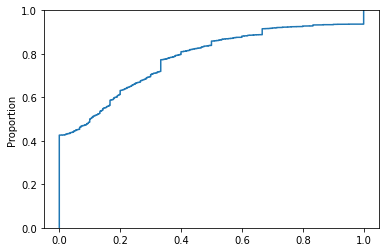

In [25]:
fig = plot_clustering(lastfm)

In [4]:
degrees = np.array(list(dict(nx.degree(lastfm)).values()))

In [5]:
N = len(degrees)
vals, counts = np.unique(degrees, return_counts=True)
counts = counts

In [6]:
vals_log = np.log(vals)
counts_log = np.log(counts)

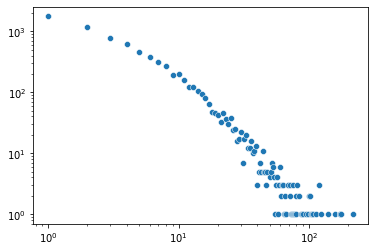

In [10]:
fig, ax = plt.subplots()
sns.scatterplot(x=vals, y=counts, ax=ax)
ax.set_xscale("log")
ax.set_yscale("log")

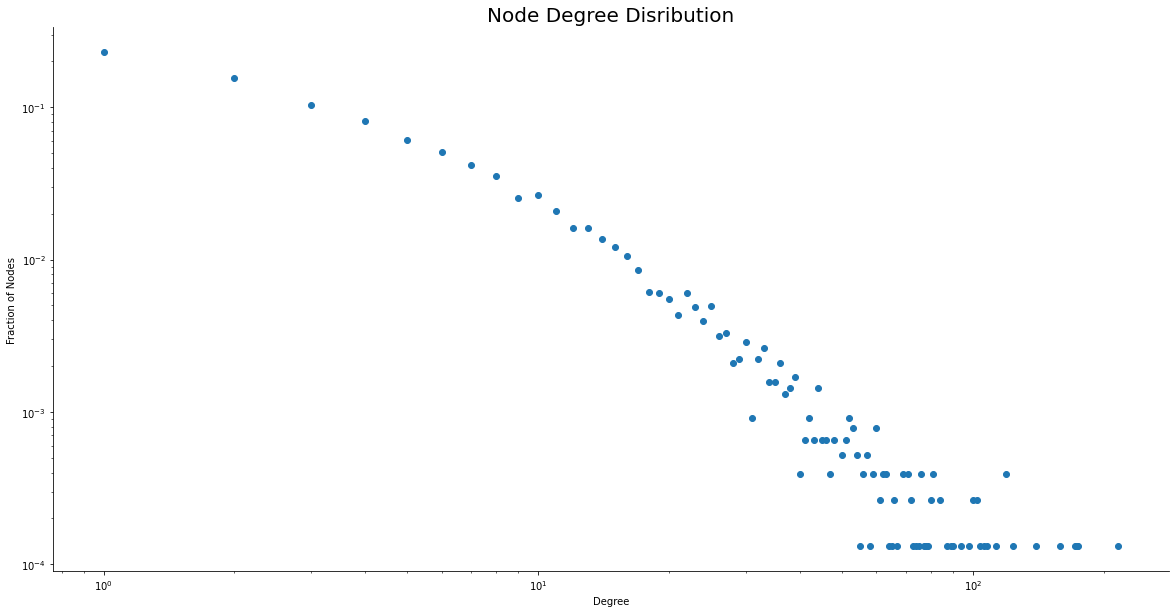

In [14]:
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(vals, counts, "o")

ax.set_title('Node Degree Disribution', fontsize=20)
ax.set_xlabel('Degree')
ax.set_ylabel('Fraction of Nodes')
ax.set(xscale="log", yscale="log")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

sns.histplot(degrees, ax=ax, )

ax.set_title('Node Degree Disribution', fontsize=20)
ax.set_xlabel('Degree')
ax.set(xscale="log", yscale="log")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [ ]:
list(nx.bridges(lastfm))

In [ ]:
x = np.linspace(min(degrees), max(degrees)+1, 100)

In [ ]:
pd.cut(degrees, bins=x, retbins=True)[0]

[NaN, (7.545, 9.727], (9.727, 11.909], (25.0, 27.182], (22.818, 25.0], ..., NaN, NaN, NaN, NaN, NaN]
Length: 7624
Categories (99, interval[float64, right]): [(1.0, 3.182] < (3.182, 5.364] < (5.364, 7.545] < (7.545, 9.727] ... (208.273, 210.455] < (210.455, 212.636] < (212.636, 214.818] < (214.818, 217.0]]

In [ ]:
nx.betweenness_centrality(lastfm, k=10)

In [19]:
target=pd.read_csv("Data/lasftm_asia/lastfm_asia_target.csv")

In [ ]:
nx.set_node_attributes(lastfm, {str(i["id"]):i["target"] for i in target.to_dict("records")}, name="target")

In [ ]:
lastfm.nodes(data=True)

In [ ]:
lastfm_df = pd.DataFrame(lastfm.nodes(data="target"), columns=["person", "target"])

In [1]:
lastfm_df

NameError: name 'lastfm_df' is not defined

### Edge Overlap

We define the edge overlap between 2 edges i and j as $O(i,j)=\frac{|N(i)\cap N(j)-\{i,j\}|}{|N(i)\cup N(j)-\{i,j\}|}$

In [ ]:
def edge_overlap(i, j, graph):
    Ni = list(nx.neighbors(lastfm, i))
    Nj = list(nx.neighbors(lastfm, j))

    

### Community Detection

#### Louvain

In [7]:
com = nx_comm.louvain_communities(lastfm)

In [18]:
nx_comm.modularity(lastfm, com)

0.8129350125694147

In [26]:
nodes = []

for idx, partition in enumerate(com):
    for node in partition:
        nodes.append((idx, node))

In [28]:
g = nx.Graph()
g.add_edges_from(nodes)

In [34]:
proj = nx.bipartite.projected_graph(g, list(range(len(com))))

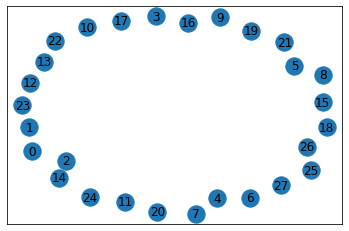

In [35]:
nx.draw_networkx(proj)

We can see a high modularity implying a strong network structure

#### BigClam

In [3]:
from cdlib import algorithms, viz, evaluation

Note: to be able to use all crisp methods, you need to install some additional packages:  {'karateclub', 'infomap', 'wurlitzer', 'graph_tool'}
Note: to be able to use all overlapping methods, you need to install some additional packages:  {'karateclub', 'ASLPAw'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'infomap', 'wurlitzer'}


In [8]:
coms = algorithms.louvain(lastfm, weight='weight', resolution=1., randomize=True)

In [ ]:
coms.average_internal_degree(summary=False)

In [ ]:
viz.plot_community_graph(lastfm , coms)

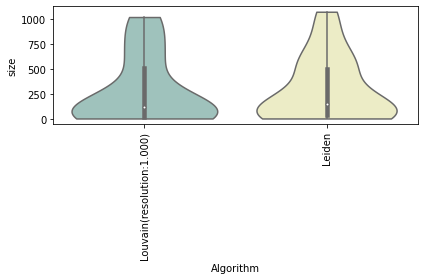

In [37]:
g = nx.karate_club_graph()
coms = algorithms.louvain(lastfm)
coms2 = algorithms.leiden(lastfm)
violinplot = viz.plot_com_stat([coms, coms2],evaluation.size)

In [12]:
mod = coms.newman_girvan_modularity()

In [13]:
mod

FitnessResult(min=None, max=None, score=0.8126325326488497, std=None)

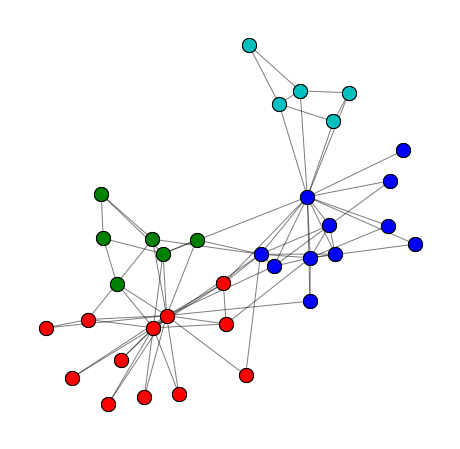

In [46]:
g = nx.karate_club_graph()
coms = algorithms.louvain(g)
pos = nx.spring_layout(g)
fig = viz.plot_network_clusters(g, coms, pos)